# 0. Agenda

- We are going to read a csv dataset using pandas
- We are going to apply different Exploratory Data Analysis (EDA) technique to understand the dataset we are dealing with
- We are going to apply different pre-processing techniques to pre-process the dataset
- We are going to apply the holdout validation technique
- We are going to use the scikit-learn's decision tree classifier to train as well to evaluate the performance of the dataset
- We are going to discuss the issue of model overfitting
- We are going to apply the same idea with a KNN classifier

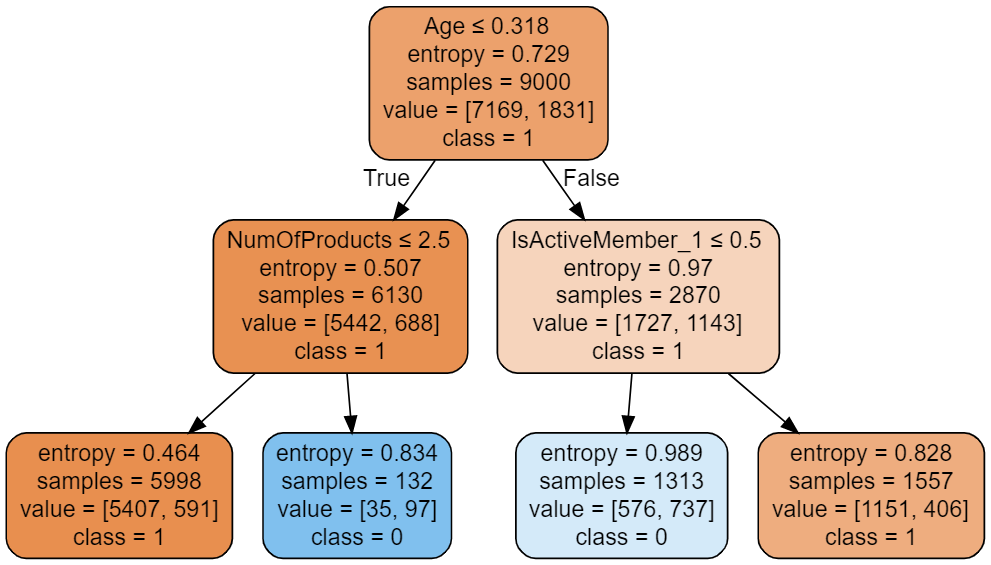

In [1]:
from IPython.display import Image

Image(filename = "graphviz.png", width=900, height=900)


# 1. Loading the Packages that we need

In [2]:
#Packages / libraries
#import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

# To install sklearn type "pip install numpy scipy scikit-learn" to the anaconda terminal

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,6)})

# Datetime lib
from pandas import to_datetime
import itertools
import warnings
import datetime
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

# pip install graphviz
# conda install python-graphviz

In [3]:
#!pip install graphviz

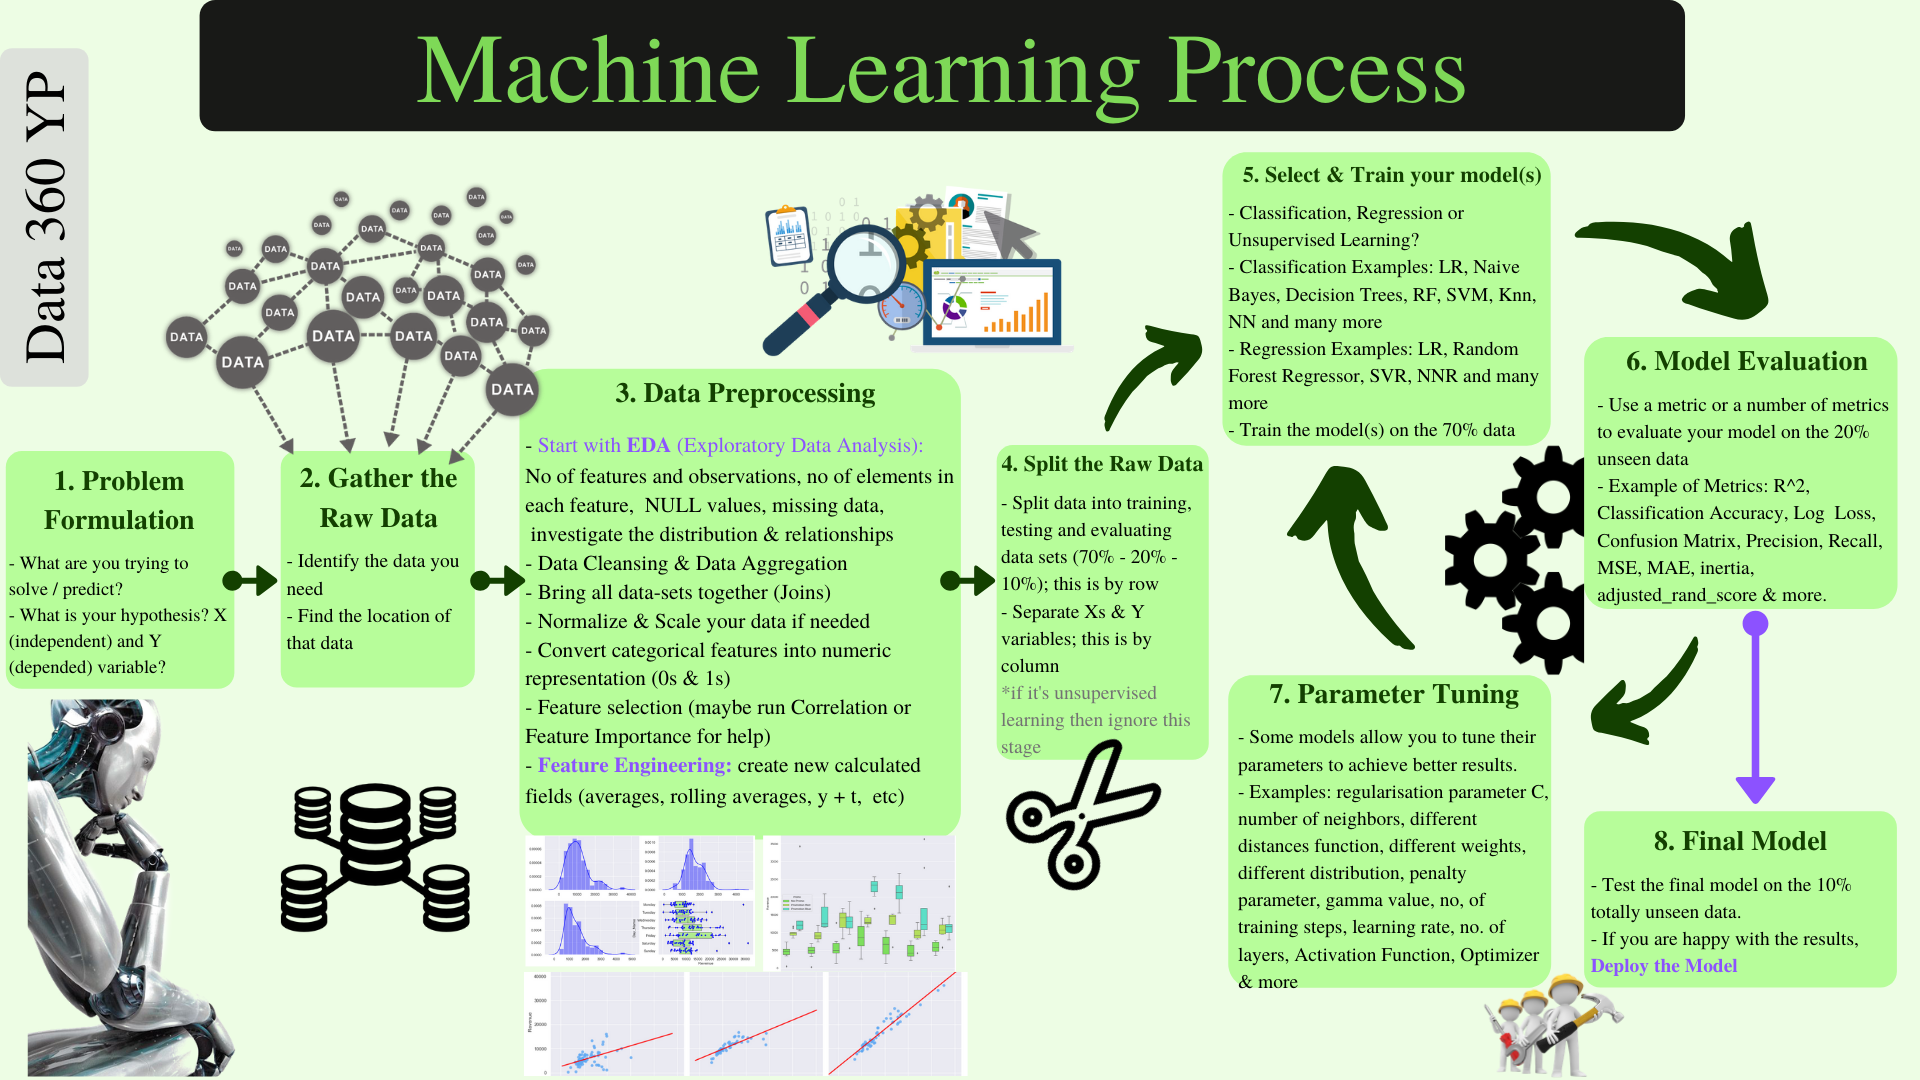

In [4]:
### Graphical ML Process
#from IPython.display import Image

Image(filename = "Machine Learning.png", width=900, height=900)


# 2. What are we trying to solve?
 - We want to predict if a customer will churn or not?

# 3. Read the raw data into Python from csv

In [5]:
raw_data = pd.read_csv('churn raw data.csv') # raw_data is the panda's dataframe

# print the shape
print(raw_data.shape)

#runs the first 5 rows
raw_data.head()

(10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# 4. Data Pre-Processing

In [6]:
raw_data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
raw_data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [8]:
# Investigate all the elements whithin each Feature 

for column in raw_data:
    unique_vals = raw_data[column].unique()
    nr_values = len(unique_vals)
    if nr_values < 12:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature RowNumber :10000
The number of values for feature CustomerId :10000
The number of values for feature Surname :2932
The number of values for feature CreditScore :460
The number of values for feature Geography :3 -- ['France' 'Spain' 'Germany']
The number of values for feature Gender :2 -- ['Female' 'Male']
The number of values for feature Age :70
The number of values for feature Tenure :11 -- [ 2  1  8  7  4  6  3 10  5  9  0]
The number of values for feature Balance :6382
The number of values for feature NumOfProducts :4 -- [1 3 2 4]
The number of values for feature HasCrCard :2 -- [1 0]
The number of values for feature IsActiveMember :2 -- [1 0]
The number of values for feature EstimatedSalary :9999
The number of values for feature Exited :2 -- [1 0]


In [9]:
# Checking for null values
raw_data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
raw_data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [11]:
#list the important columns
myList = ['CreditScore', 'Geography','Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
          'IsActiveMember', 'EstimatedSalary', 'Exited']
#create a new dataframe with this list
raw_data2 = raw_data[myList]
print(raw_data2.shape)
raw_data2.head()


(10000, 11)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


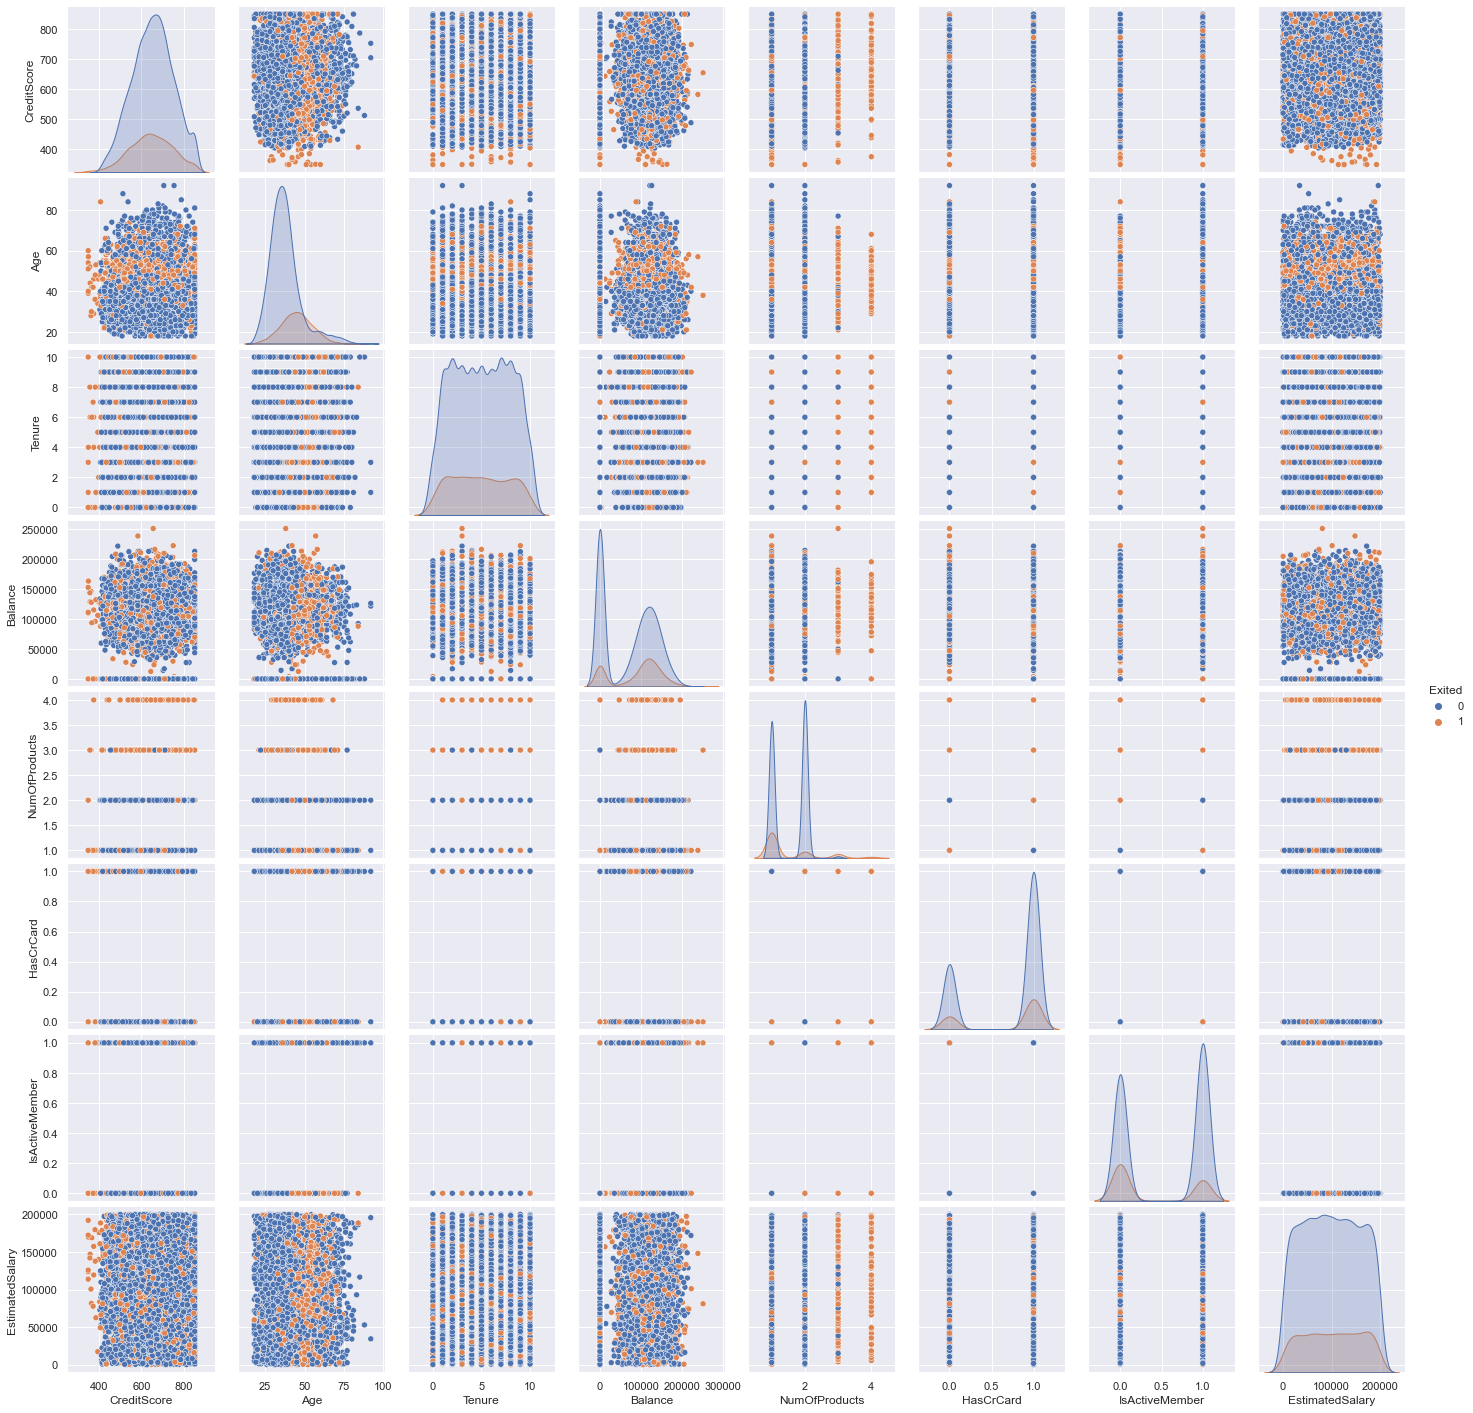

In [12]:
#visualize the dataset with sns pairplot
#caution: takes a lot of data - so we limit the data
g = sns.pairplot(raw_data2, hue = 'Exited')

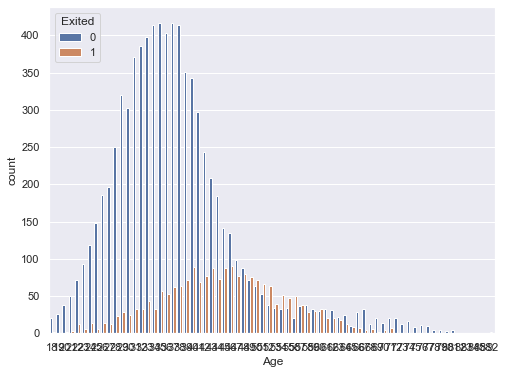

In [13]:
sns.countplot(x = 'Age', data = raw_data2, hue = 'Exited');

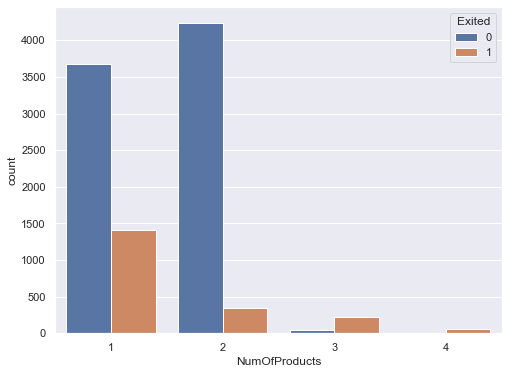

In [14]:
sns.countplot(x = 'NumOfProducts', data = raw_data2, hue = 'Exited');

# 4.1 Investigate the categorical plots

In [15]:
raw_data2.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


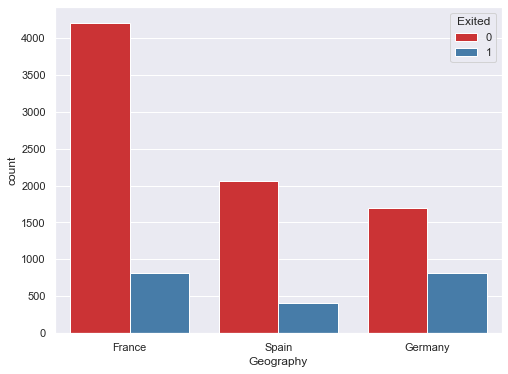

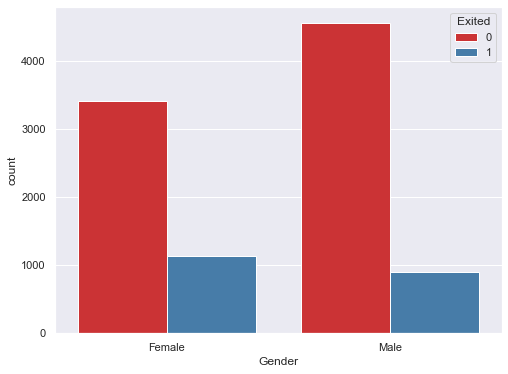

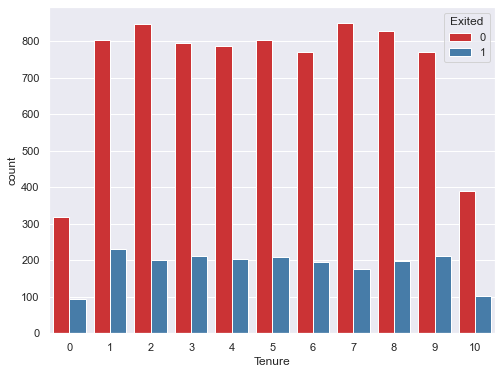

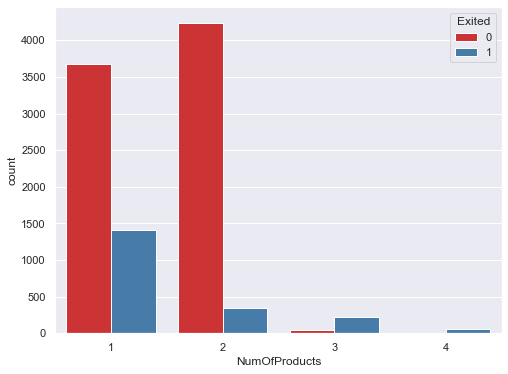

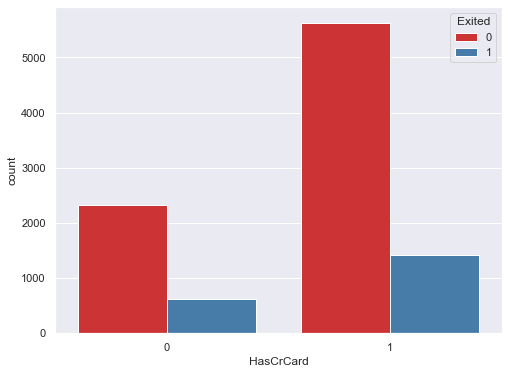

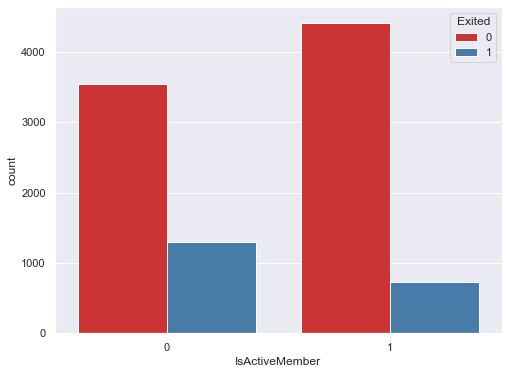

In [16]:
cat_features = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
for f in cat_features:
    plt.figure()
    sns.countplot(x = f, data = raw_data2, hue = 'Exited', palette = 'Set1')

# 4.2 Making numeric representation of categorical variables

In [17]:
print(raw_data2.shape)
raw_data2.head()

(10000, 11)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
new_raw_data = pd.get_dummies(raw_data2, columns = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember'])
print(new_raw_data.shape)
new_raw_data.head()

(10000, 16)


,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
0,619,42,2,0.00,1,101348.88,1,1,0,0,1,0,0,1,0,1
1,608,41,1,83807.86,1,112542.58,0,0,0,1,1,0,1,0,0,1
2,502,42,8,159660.80,3,113931.57,1,1,0,0,1,0,0,1,1,0
3,699,39,1,0.00,2,93826.63,0,1,0,0,1,0,1,0,1,0
4,850,43,2,125510.82,1,79084.10,0,0,0,1,1,0,0,1,0,1


# 4.3 Scaling the columns

In [19]:
new_raw_data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881,0.203700,0.501400,0.250900,0.247700,0.454300,0.545700,0.29450,0.70550,0.484900,0.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818,0.402769,0.500023,0.433553,0.431698,0.497932,0.497932,0.45584,0.45584,0.499797,0.499797
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,1.00000,0.000000,1.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000


In [20]:
#the columns that require scaling include
# CreditScore
# Age
# Balance
# EstimatedSalary
scale_vars = ['CreditScore','EstimatedSalary','Balance','Age']
scaler = MinMaxScaler()
new_raw_data[scale_vars] = scaler.fit_transform(new_raw_data[scale_vars])
new_raw_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
0,0.538,0.324324,2,0.000000,1,0.506735,1,1,0,0,1,0,0,1,0,1
1,0.516,0.310811,1,0.334031,1,0.562709,0,0,0,1,1,0,1,0,0,1
2,0.304,0.324324,8,0.636357,3,0.569654,1,1,0,0,1,0,0,1,1,0
3,0.698,0.283784,1,0.000000,2,0.469120,0,1,0,0,1,0,1,0,1,0
4,1.000,0.337838,2,0.500246,1,0.395400,0,0,0,1,1,0,0,1,0,1


# 5. Splitting the Raw Data - Hold-out validation

In [21]:
X = new_raw_data.drop(columns = 'Exited').values# Input features (attributes)
y = new_raw_data['Exited'].values # Target vector
print('X shape: {}'.format(np.shape(X)))
print('y shape: {}'.format(np.shape(y)))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9, test_size=0.1, random_state=0)

X shape: (10000, 15)
y shape: (10000,)


# 6. Running a Decision Tree

In [34]:
# create a model 
dt = DecisionTreeClassifier(max_depth = 2, random_state=1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=1)

In [35]:
import graphviz 

dot_data = tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=new_raw_data.drop('Exited', axis=1).columns,    
    class_names=new_raw_data['Exited'].unique().astype(str),  
    filled=True, rounded=True,  
    special_characters=True)
graph = graphviz.Source(dot_data)
#graph
#Go to https://dreampuf.github.io/GraphvizOnline
# and put the code in tree.dot to visualize the tree

# 7. Feature Importance

In [24]:
for i, column in enumerate(new_raw_data.drop('Exited', axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, dt.feature_importances_[i]))
    
    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [dt.feature_importances_[i]]})
    
    try:
        final_fi = pd.concat([final_fi,fi], ignore_index = True)
    except:
        final_fi = fi
        
        
# Ordering the data
final_fi = final_fi.sort_values('Feature Importance Score', ascending = False).reset_index()            
final_fi

Importance of feature CreditScore:, 0.000
Importance of feature Age:, 0.622
Importance of feature Tenure:, 0.000
Importance of feature Balance:, 0.000
Importance of feature NumOfProducts:, 0.196
Importance of feature EstimatedSalary:, 0.000
Importance of feature Geography_France:, 0.000
Importance of feature Geography_Germany:, 0.000
Importance of feature Geography_Spain:, 0.000
Importance of feature Gender_Female:, 0.000
Importance of feature Gender_Male:, 0.000
Importance of feature HasCrCard_0:, 0.000
Importance of feature HasCrCard_1:, 0.000
Importance of feature IsActiveMember_0:, 0.000
Importance of feature IsActiveMember_1:, 0.182


,index,Variable,Feature Importance Score
0,1,Age,0.622346
1,4,NumOfProducts,0.195552
2,14,IsActiveMember_1,0.182102
3,0,CreditScore,0.000000
4,2,Tenure,0.000000
5,3,Balance,0.000000
6,5,EstimatedSalary,0.000000
7,6,Geography_France,0.000000
8,7,Geography_Germany,0.000000
9,8,Geography_Spain,0.000000


# 8. Results

In [36]:
# Accuracy on Train
print("Training Accuracy is: ", dt.score(X_train, y_train))

# Accuracy on Test
print("Testing Accuracy is: ", dt.score(X_test, y_test))

Training Accuracy is:  0.8294444444444444
Testing Accuracy is:  0.829


In [26]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

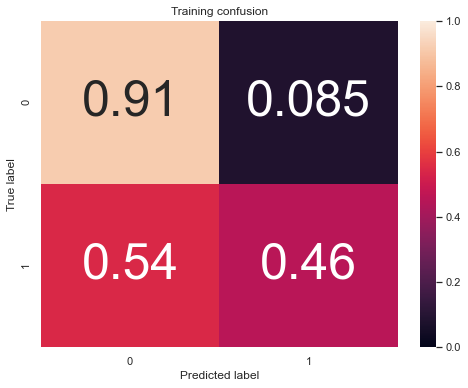

In [27]:
y_pred = dt.predict(X_train)

# Plotting Confusion Matrix
cm = confusion_matrix(y_train, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=dt.classes_, title='Training confusion')

In [28]:
cm

array([[6558,  611],
       [ 997,  834]], dtype=int64)

# Model Overfitting


Overfitting happens when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data. This means that the noise or random fluctuations in the training data is picked up and learned as concepts by the model. The problem is that these concepts do not apply to new data and negatively impact the models ability to generalize.

# Techniques to avoid overfitting

-Early stopping: As we mentioned earlier, this method seeks to pause training before the model starts learning the noise within the model. This approach risks halting the training process too soon, leading to the opposite problem of underfitting. Finding the “sweet spot” between underfitting and overfitting is the ultimate goal here.

-Train with more data: Expanding the training set to include more data can increase the accuracy of the model by providing more opportunities to parse out the dominant relationship among the input and output variables. That said, this is a more effective method when clean, relevant data is injected into the model. Otherwise, you could just continue to add more complexity to the model, causing it to overfit.

-Data augmentation: While it is better to inject clean, relevant data into your training data, sometimes noisy data is added to make a model more stable. However, this method should be done sparingly.

-Feature selection: When you build a model, you’ll have a number of parameters or features that are used to predict a given outcome, but many times, these features can be redundant to others. Feature selection is the process of identifying the most important ones within the training data and then eliminating the irrelevant or redundant ones. 

-Ensemble methods: Ensemble learning methods are made up of a set of classifiers—e.g. decision trees—and their predictions are aggregated to identify the most popular result. The most well-known ensemble methods are bagging and boosting. In bagging, a random sample of data in a training set is selected with replacement—meaning that the individual data points can be chosen more than once. After several data samples are generated, these models are then trained independently, and depending on the type of task—i.e. regression or classification—the average or majority of those predictions yield a more accurate estimate. This is commonly used to reduce variance within a noisy dataset.

Depth =  2 , Training Accuracy =  0.8294444444444444 , Test Accuracy =  0.829 , Diff =  0.04444444444444695  %
Depth =  3 , Training Accuracy =  0.8396666666666667 , Test Accuracy =  0.842 , Diff =  0.23333333333332984  %
Depth =  4 , Training Accuracy =  0.8512222222222222 , Test Accuracy =  0.849 , Diff =  0.22222222222222365  %
Depth =  5 , Training Accuracy =  0.859 , Test Accuracy =  0.858 , Diff =  0.10000000000000009  %
Depth =  6 , Training Accuracy =  0.8665555555555555 , Test Accuracy =  0.862 , Diff =  0.4555555555555535  %
Depth =  7 , Training Accuracy =  0.8723333333333333 , Test Accuracy =  0.849 , Diff =  2.3333333333333317  %
Depth =  8 , Training Accuracy =  0.88 , Test Accuracy =  0.854 , Diff =  2.6000000000000023  %
Depth =  9 , Training Accuracy =  0.8895555555555555 , Test Accuracy =  0.842 , Diff =  4.755555555555557  %
Depth =  10 , Training Accuracy =  0.8991111111111111 , Test Accuracy =  0.834 , Diff =  6.511111111111112  %
Depth =  15 , Training Accuracy = 

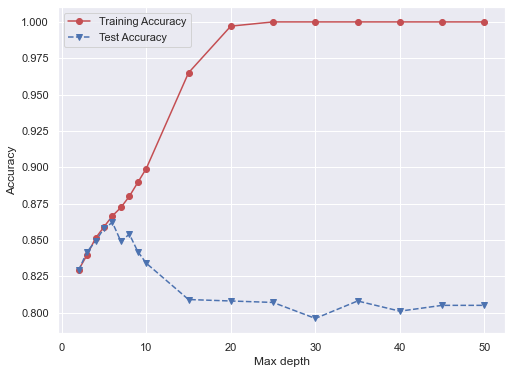

In [29]:
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]
trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(y_train, y_predTrain)
    testAcc[index] = accuracy_score(y_test, y_predTest)
    print("Depth = ", depth, ", Training Accuracy = ", trainAcc[index], ", Test Accuracy = ", testAcc[index], 
          ", Diff = ", np.abs((trainAcc[index]-testAcc[index])*100), " %")
    index += 1

    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy');

# KNN Classifier

X shape: (10000, 15)
y shape: (10000,)
K =  1 , Training Accuracy =  1.0  Test Accuracy =  0.771 , Difference =  22.9 %
K =  5 , Training Accuracy =  0.8548888888888889  Test Accuracy =  0.812 , Difference =  4.288888888888886 %
K =  10 , Training Accuracy =  0.8255555555555556  Test Accuracy =  0.807 , Difference =  1.8555555555555547 %
K =  15 , Training Accuracy =  0.8194444444444444  Test Accuracy =  0.801 , Difference =  1.8444444444444374 %
K =  20 , Training Accuracy =  0.8122222222222222  Test Accuracy =  0.81 , Difference =  0.22222222222221255 %
K =  25 , Training Accuracy =  0.8122222222222222  Test Accuracy =  0.811 , Difference =  0.12222222222221246 %
K =  30 , Training Accuracy =  0.8097777777777778  Test Accuracy =  0.81 , Difference =  0.022222222222223476 %


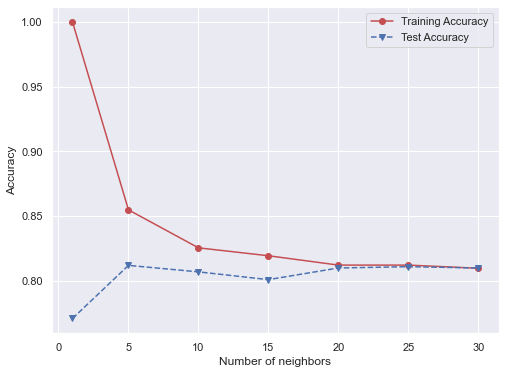

In [30]:
from sklearn.neighbors import KNeighborsClassifier
X = new_raw_data.drop(columns = 'Exited').values# Input features (attributes)
y = new_raw_data['Exited'].values # Target vector
print('X shape: {}'.format(np.shape(X)))
print('y shape: {}'.format(np.shape(y)))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9, test_size=0.1, random_state=0)
numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(y_train, y_predTrain))
    testAcc.append(accuracy_score(y_test, y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy');

index = 0
for i in numNeighbors:
    print("K = ", numNeighbors[index], ", Training Accuracy = ", trainAcc[index], " Test Accuracy = ", testAcc[index], 
          ", Difference = ", np.abs(trainAcc[index]-testAcc[index])*100, "%")
    index+=1